In [1]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 19.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=f1fedf6bdaa953d6f9b0c7689c312b2488a2dd7d6e9d93e602a84ee710bfd033
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
journal_colors = {
    'SciMet': '#000080',  # ネイビー
    'SSS': '#ff7f0e',  # オレンジ
    'RePoli': '#2ca02c',  # 緑
    'STHV': '#d62728',  # 赤
    'TechNov': '#9467bd',  # 紫
    'PUS': '#8c564b',  # 茶
    'Minerva': '#e377c2',  # ピンク
    'SciCom': '#7f7f7f',  # グレー
    'SasC': '#bcbd22',  # 黄緑
    'ReEval': '#17becf',  # 水色
    'STS': '#ff9896',  # ピンク
    'JRI': '#1f77b4',  # 青
    'EASTS': '#ffbb78',  # ピーチ
    'TIS': 'teal',  # ディール
    'SPP': 'olive',  # オリーブ
    'JCOM': 'darkolivegreen'  # ダークグリーン
}

# 分散ランキング

In [3]:
os.chdir("/content/drive/MyDrive/卒論/STS_ALL/variance_betweeness")

In [4]:
years = [1991, 1996, 2001, 2006, 2011, 2016, 2021]
for i in years:
  path = f"/content/drive/MyDrive/卒論/STS_ALL/results/{i}_vectlized.json"
  df = pd.read_json(path)
  variance_df = df.groupby('journal_name')[['UMAP1', 'UMAP2', 'UMAP3']].var().mean(axis=1).sort_values(ascending=False)
  # 結果をCSVに保存
  #variance_df.to_csv(f'variance_ranking_{years[num]}.csv', index=True)
  print(variance_df)

journal_name
SPP        2.233686
TIS        1.471072
SciCom     1.426498
SSS        1.413563
RePoli     1.246127
TechNov    1.171797
STHV       1.139939
SciMet     1.049855
ReEval     1.017296
PUS        0.596223
SasC       0.082628
dtype: float64
journal_name
ReEval     5.596026
SPP        4.809945
STS        3.546886
TIS        2.801311
SciCom     1.815088
RePoli     1.413999
TechNov    1.238645
STHV       1.159918
SSS        1.057377
SciMet     0.955675
PUS        0.538921
SasC       0.151111
dtype: float64
journal_name
STS        1.605131
SPP        1.523563
TIS        1.410289
ReEval     1.302062
SciMet     1.220392
RePoli     1.219871
TechNov    1.214197
JCOM       0.929808
STHV       0.796049
SSS        0.787339
SciCom     0.680002
PUS        0.592815
SasC       0.302100
dtype: float64
journal_name
SciMet     2.690441
STS        2.446384
Minerva    2.438557
TIS        1.661745
SPP        1.478489
JCOM       1.439529
RePoli     1.228285
ReEval     1.089483
SSS        1.026952
Tec

# ランキングの推移をプロット

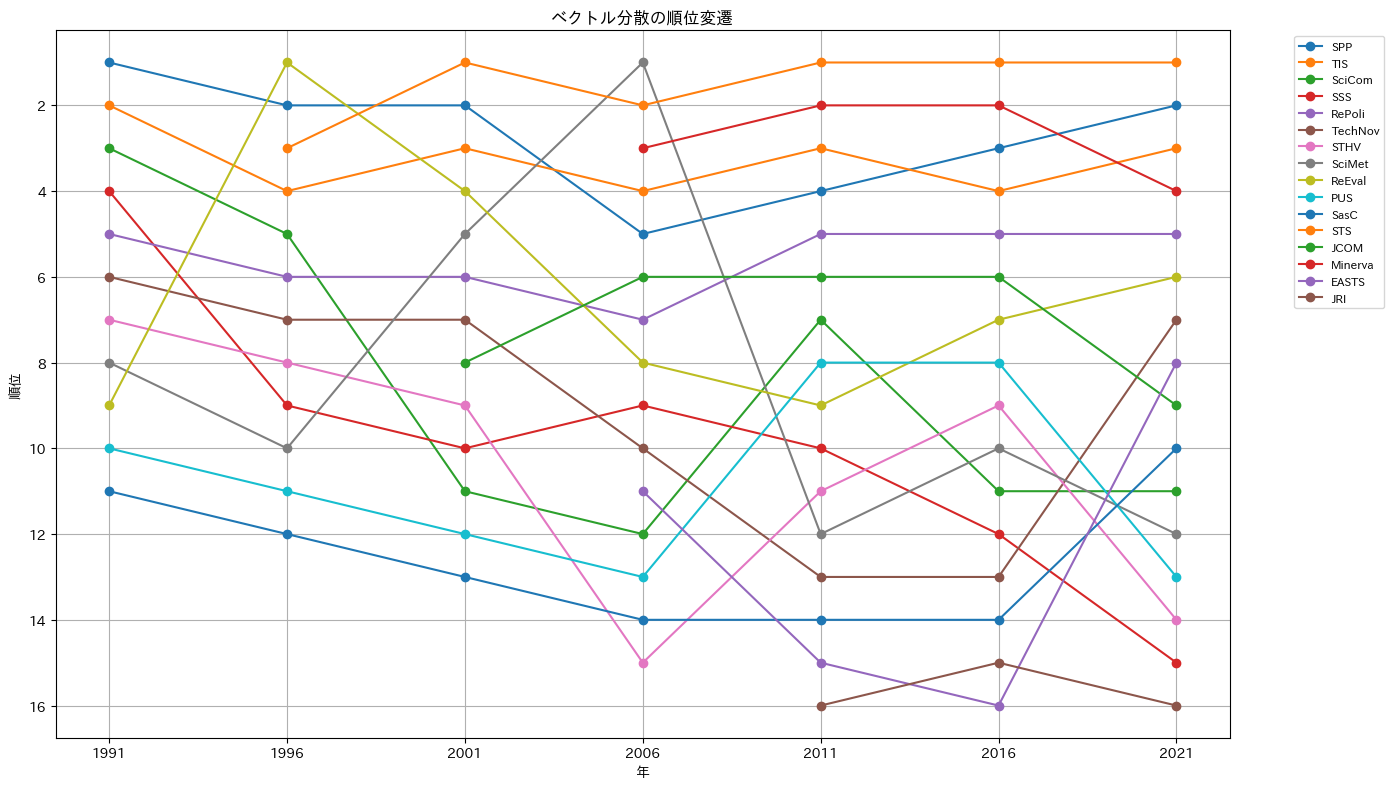

In [ ]:

# 空のリストを用意して各年のランキングデータフレームを保存
ranking_dfs = []



# 各年のランキングを計算し、データフレームに追加
for i in years:
    path = f"/content/drive/MyDrive/卒論/STS_ALL/results/{i}_vectlized.json"
    df = pd.read_json(path)
    variance_df = df.groupby('journal_name')[['UMAP1', 'UMAP2', 'UMAP3']].var().mean(axis=1).sort_values(ascending=False)
    sorted_variance = variance_df.sort_values(ascending=False)
    sorted_variance = pd.DataFrame(sorted_variance)
    sorted_variance.columns = [f'{i}_variance']
    sorted_variance['rank'] = sorted_variance[f'{i}_variance'].rank(ascending=False, method='min')  # 降順ランキングを付与
    ranking_dfs.append(sorted_variance[['rank']].rename(columns={'rank':i}))

# 時系列データを作成するため、すべてのデータフレームをマージ
ranking_time_series = pd.concat(ranking_dfs, axis=1)

# 折れ線グラフを作成
plt.figure(figsize=(14, 8))

# 各ジャーナルの時系列ランキングをプロット
for journal in ranking_time_series.index:
    plt.plot(ranking_time_series.columns, ranking_time_series.loc[journal], marker='o', label=journal)

# グラフの調整
plt.gca().invert_yaxis()  # y軸を反転して、1位が上にくるようにする
plt.xticks(years)  # x軸のラベルを年に設定
plt.xlabel("年")
plt.ylabel("順位")
plt.title("ベクトル分散の順位変遷")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()

# グラフを表示
plt.show()


#8位以内のみ

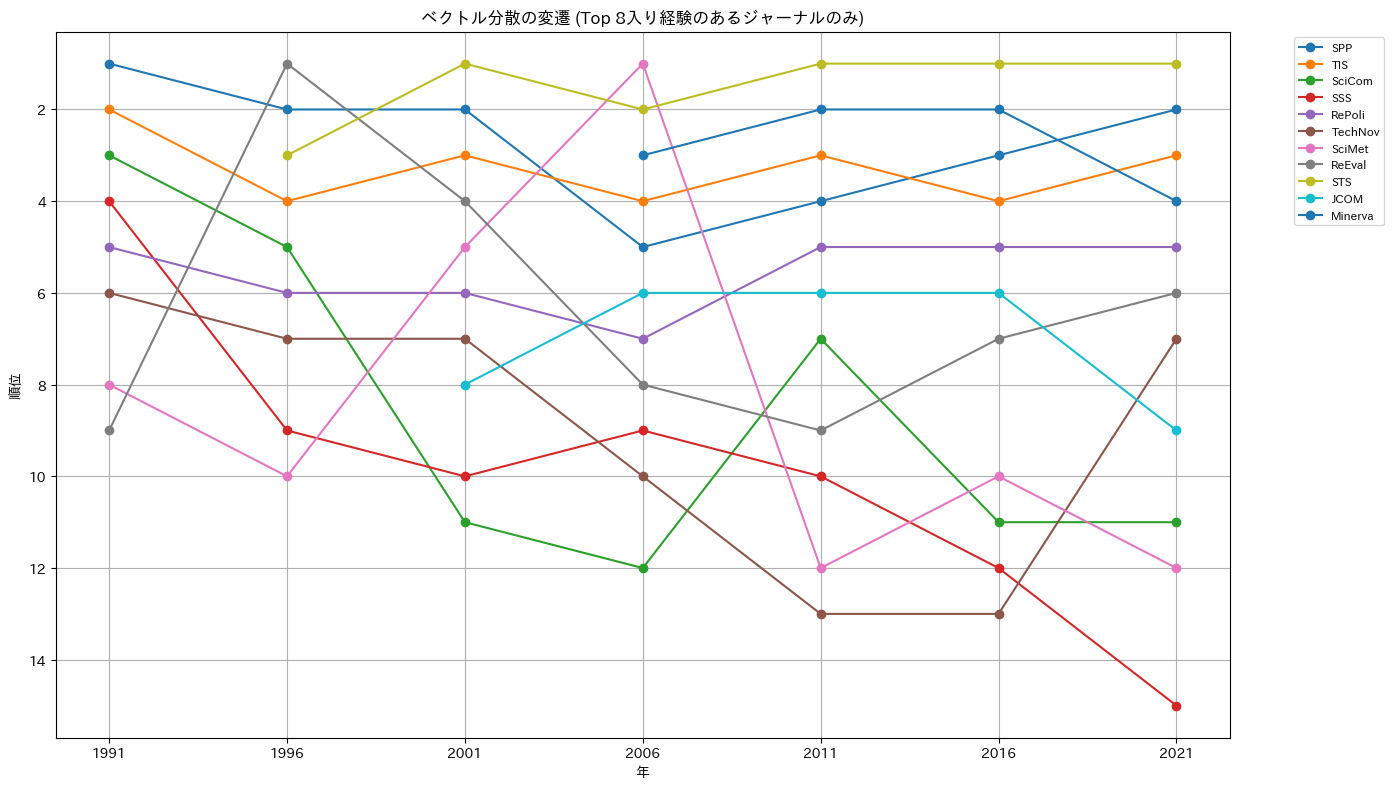

In [ ]:


# 各年のデータフレームが格納されているリスト
years = [1991, 1996, 2001, 2006, 2011, 2016, 2021]


# 8位以内に入ったことが一度でもあるジャーナルのみを抽出
filtered_ranking = ranking_time_series[ranking_time_series.min(axis=1) <= 6]

# 折れ線グラフを作成
plt.figure(figsize=(14, 8))

# 8位以内に入ったジャーナルの時系列ランキングをプロット
for journal in filtered_ranking.index:
    plt.plot(filtered_ranking.columns, filtered_ranking.loc[journal], marker='o', label=journal)

# グラフの調整
plt.gca().invert_yaxis()  # y軸を反転して、1位が上にくるようにする
plt.xticks(years)  # x軸のラベルを年に設定
plt.xlabel("年")
plt.ylabel("順位")
plt.title("ベクトル分散の変遷 (Top 8入り経験のあるジャーナルのみ)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.savefig(f"ranking_transition_variable.png", bbox_inches='tight')

# グラフを表示
plt.show()


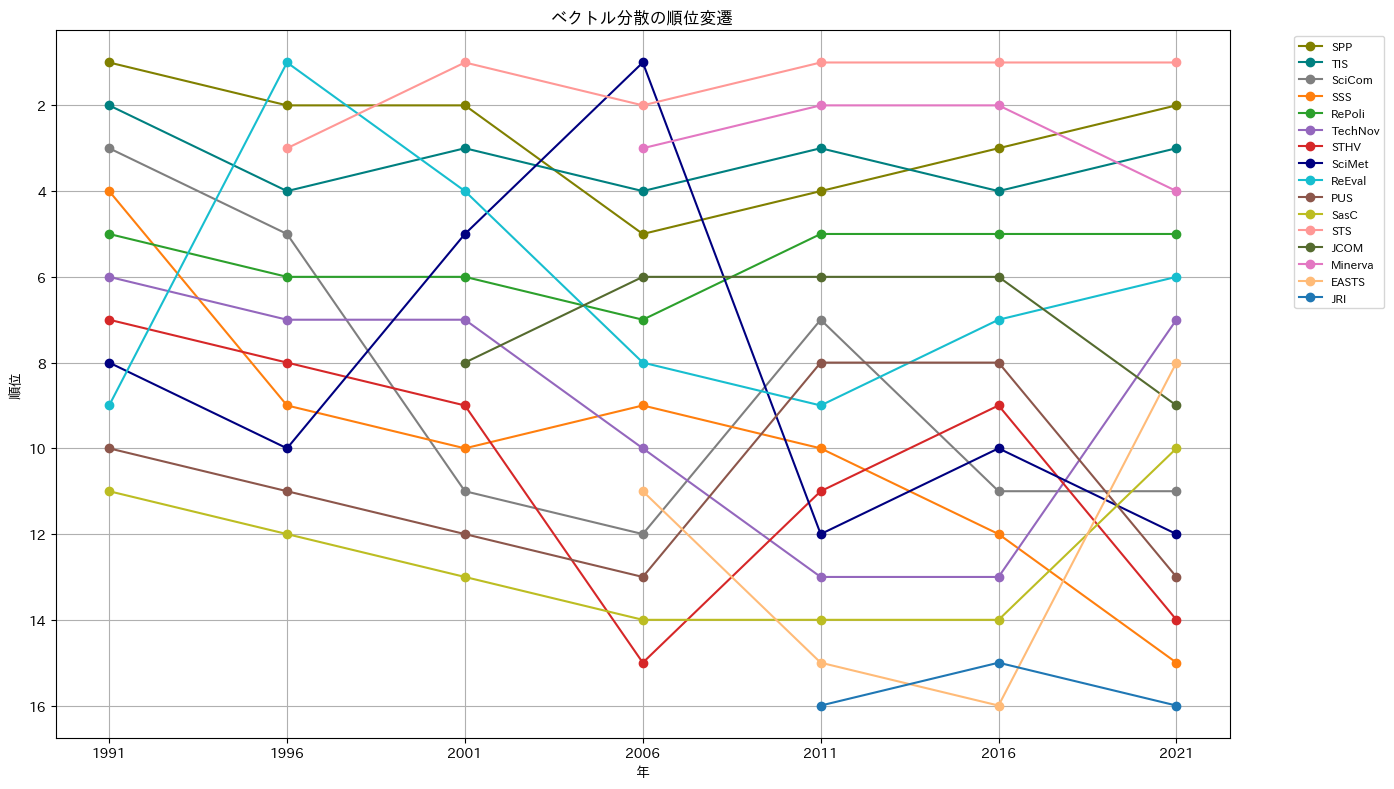

In [5]:
# 空のリストを用意して各年のランキングデータフレームを保存
ranking_dfs = []



# 各年のランキングを計算し、データフレームに追加
for i in years:
    path = f"/content/drive/MyDrive/卒論/STS_ALL/results/{i}_vectlized.json"
    df = pd.read_json(path)
    variance_df = df.groupby('journal_name')[['UMAP1', 'UMAP2', 'UMAP3']].var().mean(axis=1).sort_values(ascending=False)
    sorted_variance = variance_df.sort_values(ascending=False)
    sorted_variance = pd.DataFrame(sorted_variance)
    sorted_variance.columns = [f'{i}_variance']
    sorted_variance['rank'] = sorted_variance[f'{i}_variance'].rank(ascending=False, method='min')  # 降順ランキングを付与
    ranking_dfs.append(sorted_variance[['rank']].rename(columns={'rank':i}))

# 時系列データを作成するため、すべてのデータフレームをマージ
ranking_time_series = pd.concat(ranking_dfs, axis=1)

# 折れ線グラフを作成
plt.figure(figsize=(14, 8))

# 各ジャーナルの時系列ランキングをプロット
for journal in ranking_time_series.index:
    color = journal_colors.get(journal, '#000000')  # カラー辞書から色を取得、存在しない場合は黒('#000000')をデフォルトにする
    plt.plot(
        ranking_time_series.columns,  # 年のリスト
        ranking_time_series.loc[journal],  # 順位データ
        marker='o',
        label=journal,
        color=color  # 色を指定
    )

# グラフの調整
plt.gca().invert_yaxis()  # y軸を反転して、1位が上にくるようにする
plt.xticks(years)  # x軸のラベルを年に設定
plt.xlabel("年")
plt.ylabel("順位")
plt.title("ベクトル分散の順位変遷")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')  # 凡例をグラフの右上に配置
plt.grid(True)
plt.tight_layout()

# グラフを表示
plt.show()
